In [4]:
#IMPORT SECTION
import sys,os,time,glob,scipy
import obspy
import pyasdf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seisgo import noise, monitoring, utils
import seisgo.plotting as sp
from seisgo.stacking import seisstack
import matplotlib.dates as mdates
import seisgo.downloaders as dld
import pickle

In [5]:
#####FILE LOCATIONS#####
rootpath = "/home/ckupres/volcanodvv" # roothpath for the project
maindirec  = '/home/ckupres/volcanodvv/data_greatsitkin' #main project folder
direc  = os.path.join(rootpath,'data_greatsitkin/MERGED_PAIRS_ftn')
figdir = os.path.join(maindirec,'Figures')
if not os.path.isdir(figdir):os.makedirs(figdir)


sta_list = ['AV.GSCK','AV.GSMY', 'AV.GSSP', 'AV.GSTR']

204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=0.0&maxmagnitude=1.0&minlatitude=51.997299408&maxlatitude=52.024299408&minlongitude=-176.177501465&maxlongitude=-176.150501465
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=2.0001&maxmagnitude=3.0&minlatitude=51.997299408&maxlatitude=52.024299408&minlongitude=-176.177501465&maxlongitude=-176.150501465
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=4.0001&maxmagnitude=5.0&minlatitude=51.997299408&maxlatitude=52.024299408&minlongitude=-176.177501465&maxlongitude=-176.150501465
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=5.0001&maxmagnitu

/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/obspy/core/util/attribdict.py:97: UserWarning: Setting attribute "preferred_mag" which is not a default attribute ("event_descriptions", "comments", "picks", "amplitudes", "focal_mechanisms", "origins", "magnitudes", "station_magnitudes", "resource_id", "event_type", "event_type_certainty", "creation_info", "preferred_origin_id", "preferred_magnitude_id", "preferred_focal_mechanism_id").
  warnings.warn(msg)
/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/obspy/core/util/attribdict.py:97: UserWarning: Setting attribute "preferred_mag_type" which is not a default attribute ("event_descriptions", "comments", "picks", "amplitudes", "focal_mechanisms", "origins", "magnitudes", "station_magnitudes", "resource_id", "event_type", "event_type_certainty", "creation_info", "preferred_origin_id", "preferred_magnitude_id", "preferred_focal_mechanism_id").
  warnings.warn(msg)
/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/obspy/cor

204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=3.0001&maxmagnitude=4.0&minlatitude=52.028598999&maxlatitude=52.055598999&minlongitude=-176.071803833&maxlongitude=-176.044803833
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=4.0001&maxmagnitude=5.0&minlatitude=52.028598999&maxlatitude=52.055598999&minlongitude=-176.071803833&maxlongitude=-176.044803833
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=5.0001&maxmagnitude=6.0&minlatitude=52.028598999&maxlatitude=52.055598999&minlongitude=-176.071803833&maxlongitude=-176.044803833
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=6.0001&maxmagn

/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/obspy/core/util/attribdict.py:97: UserWarning: Setting attribute "preferred_mag" which is not a default attribute ("event_descriptions", "comments", "picks", "amplitudes", "focal_mechanisms", "origins", "magnitudes", "station_magnitudes", "resource_id", "event_type", "event_type_certainty", "creation_info", "preferred_origin_id", "preferred_magnitude_id", "preferred_focal_mechanism_id").
  warnings.warn(msg)
/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/obspy/core/util/attribdict.py:97: UserWarning: Setting attribute "preferred_mag_type" which is not a default attribute ("event_descriptions", "comments", "picks", "amplitudes", "focal_mechanisms", "origins", "magnitudes", "station_magnitudes", "resource_id", "event_type", "event_type_certainty", "creation_info", "preferred_origin_id", "preferred_magnitude_id", "preferred_focal_mechanism_id").
  warnings.warn(msg)
/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/obspy/cor

204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=2.0001&maxmagnitude=3.0&minlatitude=52.0782015076&maxlatitude=52.1052015076&minlongitude=-176.191203857&maxlongitude=-176.164203857
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=3.0001&maxmagnitude=4.0&minlatitude=52.0782015076&maxlatitude=52.1052015076&minlongitude=-176.191203857&maxlongitude=-176.164203857
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=4.0001&maxmagnitude=5.0&minlatitude=52.0782015076&maxlatitude=52.1052015076&minlongitude=-176.191203857&maxlongitude=-176.164203857
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=5.0001&m

/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/obspy/core/util/attribdict.py:97: UserWarning: Setting attribute "preferred_mag" which is not a default attribute ("event_descriptions", "comments", "picks", "amplitudes", "focal_mechanisms", "origins", "magnitudes", "station_magnitudes", "resource_id", "event_type", "event_type_certainty", "creation_info", "preferred_origin_id", "preferred_magnitude_id", "preferred_focal_mechanism_id").
  warnings.warn(msg)
/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/obspy/core/util/attribdict.py:97: UserWarning: Setting attribute "preferred_mag_type" which is not a default attribute ("event_descriptions", "comments", "picks", "amplitudes", "focal_mechanisms", "origins", "magnitudes", "station_magnitudes", "resource_id", "event_type", "event_type_certainty", "creation_info", "preferred_origin_id", "preferred_magnitude_id", "preferred_focal_mechanism_id").
  warnings.warn(msg)
/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/obspy/cor

204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=1.0001&maxmagnitude=2.0&minlatitude=52.0797006836&maxlatitude=52.1067006836&minlongitude=-176.074596191&maxlongitude=-176.047596191
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=2.0001&maxmagnitude=3.0&minlatitude=52.0797006836&maxlatitude=52.1067006836&minlongitude=-176.074596191&maxlongitude=-176.047596191
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=3.0001&maxmagnitude=4.0&minlatitude=52.0797006836&maxlatitude=52.1067006836&minlongitude=-176.074596191&maxlongitude=-176.047596191
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=4.0001&m

/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/obspy/core/util/attribdict.py:97: UserWarning: Setting attribute "preferred_mag" which is not a default attribute ("event_descriptions", "comments", "picks", "amplitudes", "focal_mechanisms", "origins", "magnitudes", "station_magnitudes", "resource_id", "event_type", "event_type_certainty", "creation_info", "preferred_origin_id", "preferred_magnitude_id", "preferred_focal_mechanism_id").
  warnings.warn(msg)
/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/obspy/core/util/attribdict.py:97: UserWarning: Setting attribute "preferred_mag_type" which is not a default attribute ("event_descriptions", "comments", "picks", "amplitudes", "focal_mechanisms", "origins", "magnitudes", "station_magnitudes", "resource_id", "event_type", "event_type_certainty", "creation_info", "preferred_origin_id", "preferred_magnitude_id", "preferred_focal_mechanism_id").
  warnings.warn(msg)
/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/obspy/cor

204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=2.0001&maxmagnitude=3.0&minlatitude=52.064232&maxlatitude=52.091232&minlongitude=-176.145625&maxlongitude=-176.118625
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=3.0001&maxmagnitude=4.0&minlatitude=52.064232&maxlatitude=52.091232&minlongitude=-176.145625&maxlongitude=-176.118625
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=4.0001&maxmagnitude=5.0&minlatitude=52.064232&maxlatitude=52.091232&minlongitude=-176.145625&maxlongitude=-176.118625
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=5.0001&maxmagnitude=6.0&minlatitude=52.064232&maxl

/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/obspy/core/util/attribdict.py:97: UserWarning: Setting attribute "preferred_mag" which is not a default attribute ("event_descriptions", "comments", "picks", "amplitudes", "focal_mechanisms", "origins", "magnitudes", "station_magnitudes", "resource_id", "event_type", "event_type_certainty", "creation_info", "preferred_origin_id", "preferred_magnitude_id", "preferred_focal_mechanism_id").
  warnings.warn(msg)
/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/obspy/core/util/attribdict.py:97: UserWarning: Setting attribute "preferred_mag_type" which is not a default attribute ("event_descriptions", "comments", "picks", "amplitudes", "focal_mechanisms", "origins", "magnitudes", "station_magnitudes", "resource_id", "event_type", "event_type_certainty", "creation_info", "preferred_origin_id", "preferred_magnitude_id", "preferred_focal_mechanism_id").
  warnings.warn(msg)
/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/obspy/cor

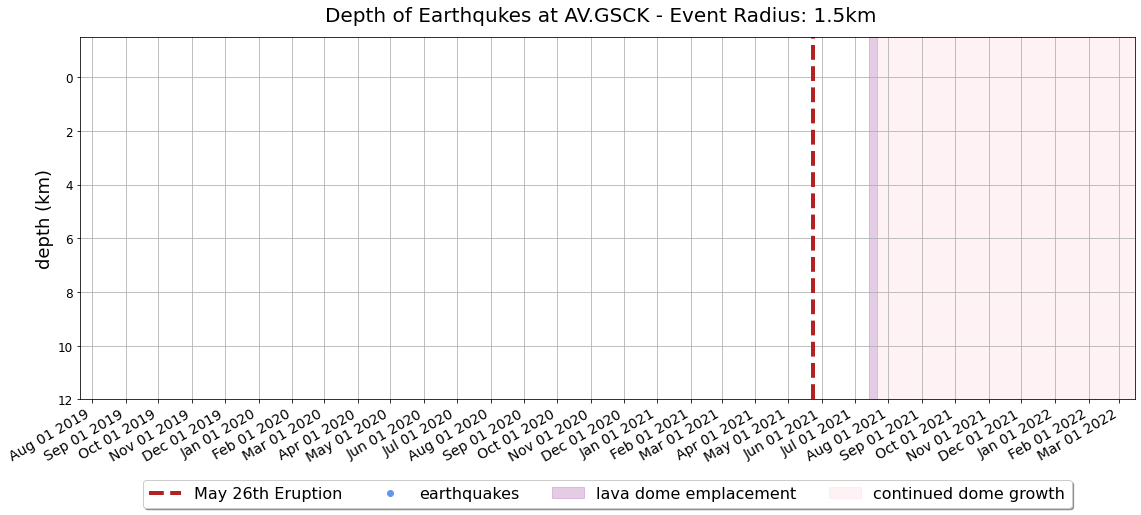

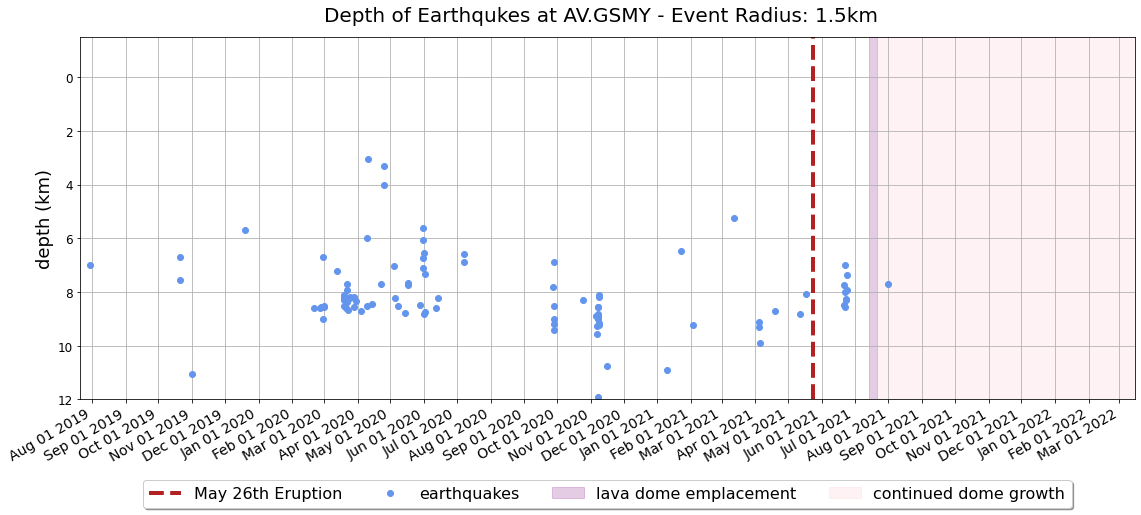

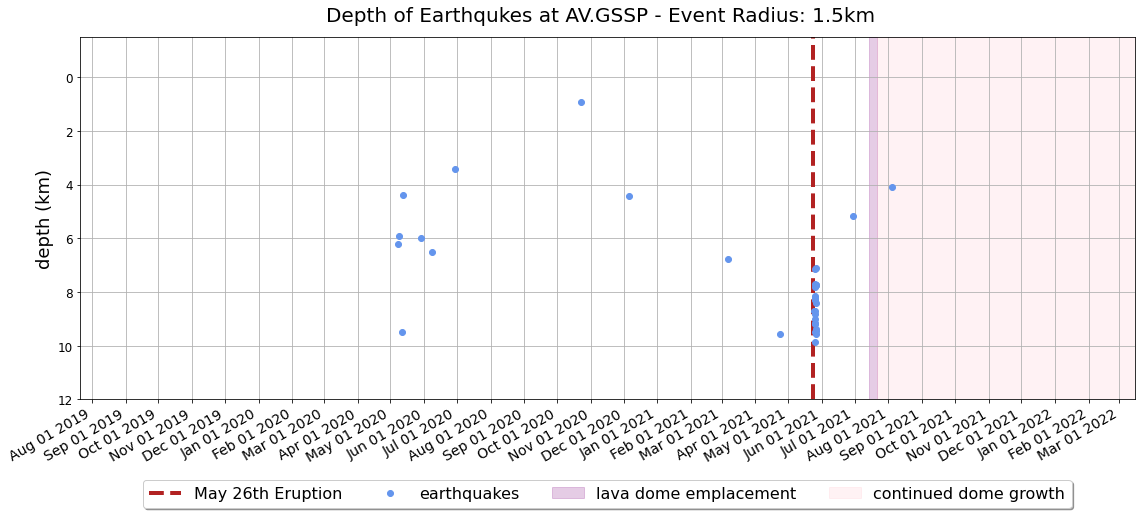

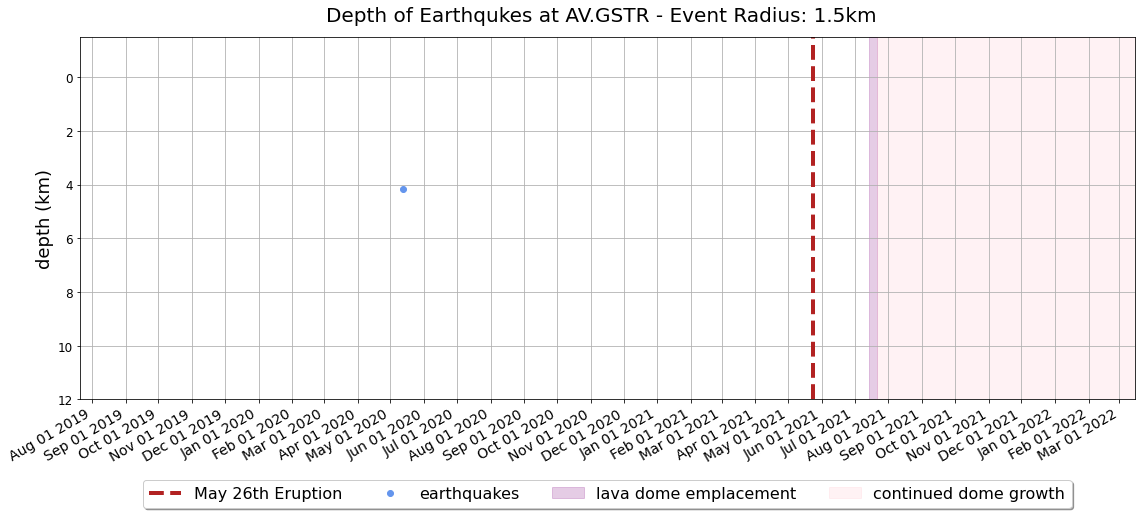

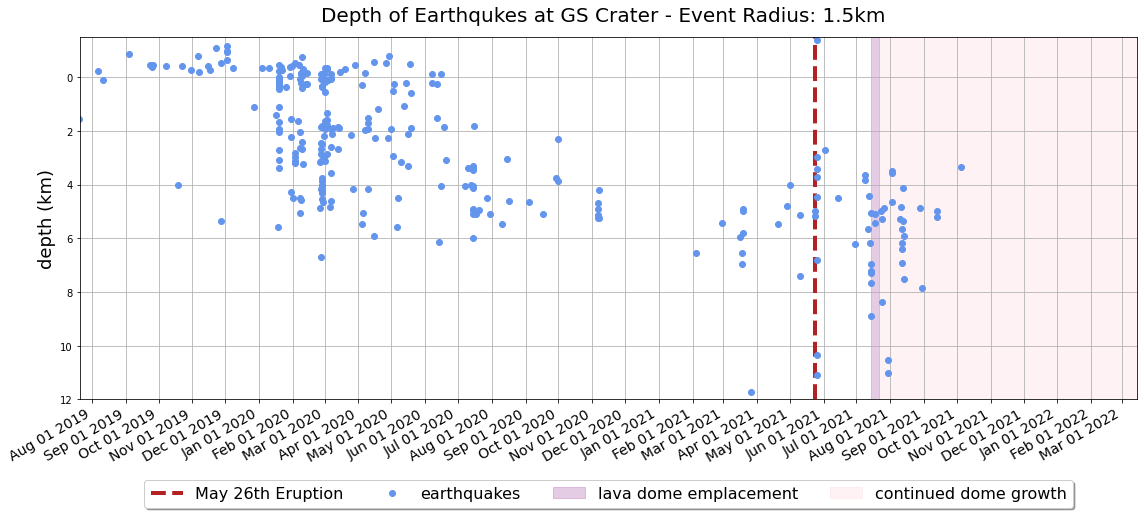

In [6]:
##SEISMICITY PLOTTING

offset = 0.0135     #decimal degree offset from station/crater (offset*111 = offset in km)
minmag = 0          #Min Max
maxmag = 9          #Max Mag
magstep = 1.0       #Magnitude Step
yrange = [-1.5,12]  #Elevation and depth





#########################################################################################
for sta in sta_list:

    source = sta
    receiver = source
    cc_comp = 'EZ'

    #file handling#
    key=source+'_'+receiver
    ccfile=sorted(glob.glob(os.path.join(direc,source,'*'+receiver+'*.h5')))[0]
    corrdata=noise.extract_corrdata(ccfile,pair=source+'_'+receiver,comp=cc_comp)
    cdata0=corrdata[key][cc_comp]
    sdate="2019-07-01"
    edate="2022-04-04"
    cdata0.subset(starttime=sdate,endtime=edate, overwrite = True)    
    
    
    #Downloading Seismicity
    minlat= np.mean(cdata0.lat)-offset
    maxlat= np.mean(cdata0.lat)+offset
    minlon= np.mean(cdata0.lon)-offset
    maxlon= np.mean(cdata0.lon)+offset
    catalog = dld.get_events(sdate,edate,minlon,maxlon,minlat,maxlat,minmag,maxmag,magstep)

    ##Plotting Seismicity
    cat=pd.DataFrame(utils.qml2list(catalog))
    ymin,ymax=yrange
    cat2=cat[(cat.depth>=yrange[0]) & (cat.depth<=yrange[1])]

    t=[]
    for i in range(len(cat2)):
        tTime=obspy.UTCDateTime(cat2.iloc[i]["datetime"])
        t.append(tTime.datetime.strftime('%Y-%m-%d %H:%M'))
    mdateslist = list(mdates.date2num(t))
    startend = [sdate,edate]
    mdatesliststartend = list(mdates.date2num(startend))



    fig, ax = plt.subplots(figsize = (16,7), facecolor = 'white')

    ax.set_ylabel('depth (km)', fontsize = 18)
    ax.plot(mdateslist,cat2.depth,'o', alpha = 0)
    ax.axvline(18771.21111111, color = 'firebrick',\
               linewidth = 4,linestyle = '--', label = 'May 26th Eruption')
    ax.plot(mdateslist,cat2.depth,'o', color  = 'cornflowerblue', label = 'earthquakes')
    ax.set_xlim([mdatesliststartend[0]+20,mdatesliststartend[1]-20])
    ax.set_ylim([ymax,ymin])

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.tick_params(axis = 'x', labelsize=14)
    ax.tick_params(axis = 'y', labelsize=12)
    ax.axvspan(18822,18830, alpha=.2, color = 'purple', label = "lava dome emplacement")
    ax.axvspan(18830,19086-20, alpha=.2, color = 'pink', label = "continued dome growth")
    ax.grid()
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          ncol=4, fancybox=True,shadow=True, prop={'size':16})
    
    figname = 'Depth of Earthqukes at '+sta+' - Event Radius: '+str(round(offset*111,2))+'km'
    fig.suptitle(figname, fontsize = 20)
    fig.tight_layout()
    fig.autofmt_xdate()
    
    filename = 'earthquake_depth_'+sta+'_radius_'+str(round(offset*111,2))+'km.png'
    fig.savefig(os.path.join(figdir, filename), format = 'png', bbox_inches='tight' )

    
##############################################################
#### Earthquakes around Crater
# 52.077732, -176.132125 Crater Coordinates

#Downloading Seismicity

minlat= np.mean(52.077732)-offset
maxlat= np.mean(52.077732)+offset
minlon= np.mean(-176.132125)-offset
maxlon= np.mean(-176.132125)+offset
catalog = dld.get_events(sdate,edate,minlon,maxlon,minlat,maxlat,minmag,maxmag,magstep)

##Plotting Seismicity
cat=pd.DataFrame(utils.qml2list(catalog))
ymin,ymax=yrange
cat2=cat[(cat.depth>=yrange[0]) & (cat.depth<=yrange[1])]

print("cat2 length: "+str(len(cat2)))

t=[]
for i in range(len(cat2)):
    tTime=obspy.UTCDateTime(cat2.iloc[i]["datetime"])
    t.append(tTime.datetime.strftime('%Y-%m-%d %H:%M'))
mdateslist = list(mdates.date2num(t))
startend = [sdate,edate]
mdatesliststartend = list(mdates.date2num(startend))



fig, ax = plt.subplots(figsize = (16,7), facecolor = 'white')


ax.set_ylabel('depth (km)', fontsize = 18)
ax.plot(mdateslist,cat2.depth,'o', alpha = 0)
ax.axvline(18771.21111111, color = 'firebrick',\
           linewidth = 4,linestyle = '--', label = 'May 26th Eruption')
ax.plot(mdateslist,cat2.depth,'o', color  = 'cornflowerblue', label = 'earthquakes')
ax.set_xlim([mdatesliststartend[0]+20,mdatesliststartend[1]-20])
ax.set_ylim([ymax,ymin])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.tick_params(axis = 'x', labelsize=14)
ax.axvspan(18822,18830, alpha=.2, color = 'purple', label = "lava dome emplacement")
ax.axvspan(18830,19086-20, alpha=.2, color = 'pink', label = "continued dome growth")
ax.grid()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
      ncol=4, fancybox=True,shadow=True, prop={'size':16})

figname = 'Depth of Earthqukes at GS Crater'+' - Event Radius: '+str(round(offset*111,2))+'km'
fig.suptitle(figname, fontsize = 20)
fig.tight_layout()
fig.autofmt_xdate()

filename = 'earthquake_depth_GS_crater'+'_radius_'+str(round(offset*111,2))+'km.png'
fig.savefig(os.path.join(figdir, filename), format = 'png', bbox_inches='tight' )

204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=4.0001&maxmagnitude=5.0&minlatitude=52.0146689369&maxlatitude=52.1407950631&minlongitude=-176.195188063&maxlongitude=-176.069061937
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=5.0001&maxmagnitude=6.0&minlatitude=52.0146689369&maxlatitude=52.1407950631&minlongitude=-176.195188063&maxlongitude=-176.069061937
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=6.0001&maxmagnitude=7.0&minlatitude=52.0146689369&maxlatitude=52.1407950631&minlongitude=-176.195188063&maxlongitude=-176.069061937
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2022-04-04&minmagnitude=7.0001&m

/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/obspy/core/util/attribdict.py:97: UserWarning: Setting attribute "preferred_mag" which is not a default attribute ("event_descriptions", "comments", "picks", "amplitudes", "focal_mechanisms", "origins", "magnitudes", "station_magnitudes", "resource_id", "event_type", "event_type_certainty", "creation_info", "preferred_origin_id", "preferred_magnitude_id", "preferred_focal_mechanism_id").
  warnings.warn(msg)
/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/obspy/core/util/attribdict.py:97: UserWarning: Setting attribute "preferred_mag_type" which is not a default attribute ("event_descriptions", "comments", "picks", "amplitudes", "focal_mechanisms", "origins", "magnitudes", "station_magnitudes", "resource_id", "event_type", "event_type_certainty", "creation_info", "preferred_origin_id", "preferred_magnitude_id", "preferred_focal_mechanism_id").
  warnings.warn(msg)
/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/obspy/cor

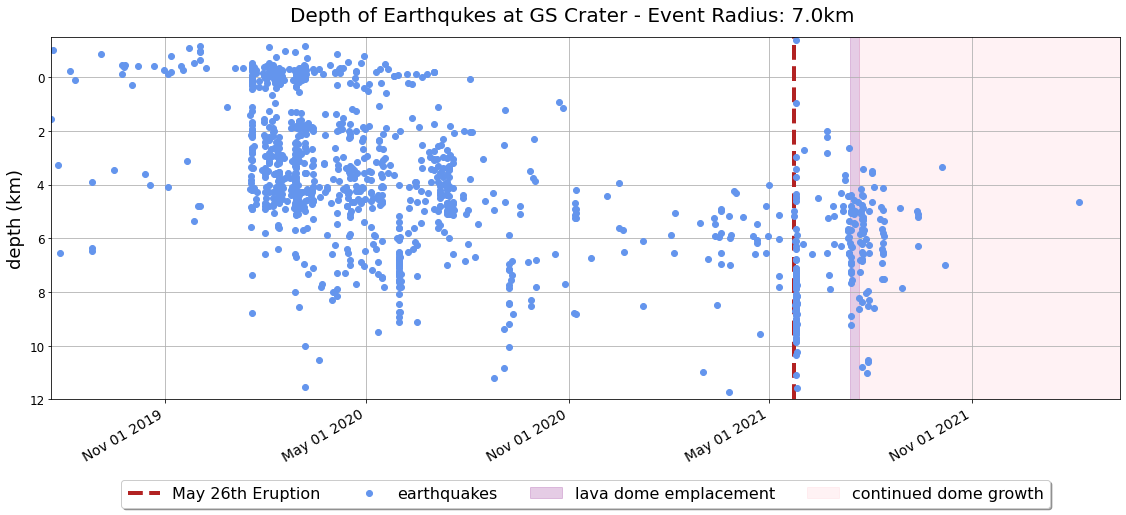

In [7]:
#(Lat,Lon) of crater: (52.077732,-176.132125)

sdate="2019-07-01"
edate="2022-04-04"
offset = 7/111 # km divided 111 to convert to decimal degrees
minmag = 0          #Min Max
maxmag = 9          #Max Mag
magstep = 1       #Magnitude Step
yrange = [-1.5,12]  #Elevation and depth

#Downloading Seismicity
minlat= np.mean(52.077732)-offset
maxlat= np.mean(52.077732)+offset
minlon= np.mean(-176.132125)-offset
maxlon= np.mean(-176.132125)+offset
catalog = dld.get_events(sdate,edate,minlon,maxlon,minlat,maxlat,minmag,maxmag,magstep, source='USGS')

##Plotting Seismicity
cat=pd.DataFrame(utils.qml2list(catalog))
ymin,ymax=yrange
cat2=cat[(cat.depth>=yrange[0]) & (cat.depth<=yrange[1])]

t=[]
for i in range(len(cat2)):
    tTime=obspy.UTCDateTime(cat2.iloc[i]["datetime"])
    t.append(tTime.datetime.strftime('%Y-%m-%d %H:%M'))
mdateslist = list(mdates.date2num(t))
startend = [sdate,edate]
mdatesliststartend = list(mdates.date2num(startend))
fig, ax = plt.subplots(figsize = (16,7), facecolor = 'white')


ax.set_ylabel('depth (km)', fontsize = 18)
ax.plot(mdateslist,cat2.depth,'o', alpha = 0)
ax.axvline(18771.21111111, color = 'firebrick',\
           linewidth = 4,linestyle = '--', label = 'May 26th Eruption')
ax.plot(mdateslist,cat2.depth,'o', color  = 'cornflowerblue', label = 'earthquakes')
ax.set_xlim([mdatesliststartend[0]+20,mdatesliststartend[1]-20])
ax.set_ylim([ymax,ymin])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.tick_params(axis = 'x', labelsize=14)
ax.tick_params(axis = 'y', labelsize=12)
ax.axvspan(18822,18830, alpha=.2, color = 'purple', label = "lava dome emplacement")
ax.axvspan(18830,19086-20, alpha=.2, color = 'pink', label = "continued dome growth")
ax.grid()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
      ncol=4, fancybox=True,shadow=True, prop={'size':16})

fig.suptitle('Depth of Earthqukes at GS Crater'+' - Event Radius: '+str(round(offset*111,2))+'km', fontsize = 20)
fig.tight_layout()
fig.autofmt_xdate()

In [8]:
print(cat2)

      number   latitude   longitude  depth                     datetime  \
0          1  52.096000 -176.150833   4.64  2022-02-06T00:46:17.530000Z   
1          2  52.060667 -176.088833   7.01  2021-10-07T21:41:07.320000Z   
3          4  52.071833 -176.123167   5.19  2021-09-13T05:07:29.140000Z   
4          5  52.051000 -176.113667   6.28  2021-09-13T05:05:41.070000Z   
5          6  52.062667 -176.115833   5.10  2021-09-13T05:00:30.590000Z   
...      ...        ...         ...    ...                          ...   
1166    1167  52.056200 -176.112800   4.60  2020-03-13T19:08:29.468000Z   
1167    1168  52.060500 -176.115833   2.76  2020-03-07T22:54:34.210000Z   
1168    1169  52.069100 -176.115500   3.00  2020-02-16T18:24:17.906000Z   
1170    1171  52.064500 -176.113900   4.90  2020-01-30T12:17:07.213000Z   
1176    1177  52.019500 -176.084100  10.00  2020-03-06T15:51:47.227000Z   

      magnitude magnitude_type author           event_id  \
0          0.29             ml   None  

In [9]:
power_cat=pd.read_csv('avo_1989-2018_hypoi.summary.csv')

cratercoords = [52.077732,-176.132125]
offset = 7/111 #km divided 111 to convert to decimal degrees
minmag = 0          #Min Max
maxmag = 9          #Max Mag
yrange = [-1.5,12]  #Elevation and depth


cat0 = power_cat[(power_cat.Lat>=cratercoords[0]-offset) & (power_cat.Lat<=cratercoords[0]+offset)\
                 & (power_cat.Lon>=cratercoords[1]-offset) & (power_cat.Lon<=cratercoords[1]+offset)\
                 & (power_cat.Depth>=yrange[0]) & (power_cat.Depth<=yrange[1])\
                 & (power_cat.Mag>=minmag) & (power_cat.Mag<=maxmag)]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(cat0)



                   Date      Lat       Lon  Depth   Mag Mt  Nst  Gap  Clo  \
22182    1999-9-20 0:48  52.0852 -176.1475   9.32  0.20  l    0  151  2.0   
22189    1999-9-22 0:19  52.0348 -176.1343   5.14  0.50  l    0  224  2.0   
22203    1999-9-24 0:03  52.1138 -176.1802  -0.71  0.10  l    0  289  2.0   
22222    1999-9-27 0:37  52.0772 -176.1223   3.99  0.80  l    0  132  3.0   
22724    2000-1-13 0:40  52.0700 -176.1375   0.10  1.00  l    0  111  2.0   
22846    2000-2-12 0:37  52.0678 -176.1418  -0.01  0.30  l    0  124  1.0   
22849    2000-2-13 0:38  52.0607 -176.1608   4.89  0.60  l    0  159  1.0   
22894    2000-2-27 0:35  52.0690 -176.1213   3.54  0.50  l    0  112  2.0   
22895    2000-2-27 0:39  52.0688 -176.1205   3.60  0.70  l    0  112  2.0   
22956    2000-3-17 0:08  52.0668 -176.1198   3.07  0.60  l    0  108  2.0   
22999    2000-3-28 0:34  52.0783 -176.1550   4.41  0.70  l    0  129  2.0   
23000    2000-3-28 0:38  52.0777 -176.1315  -1.35  0.30  l    0  133  3.0   

/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


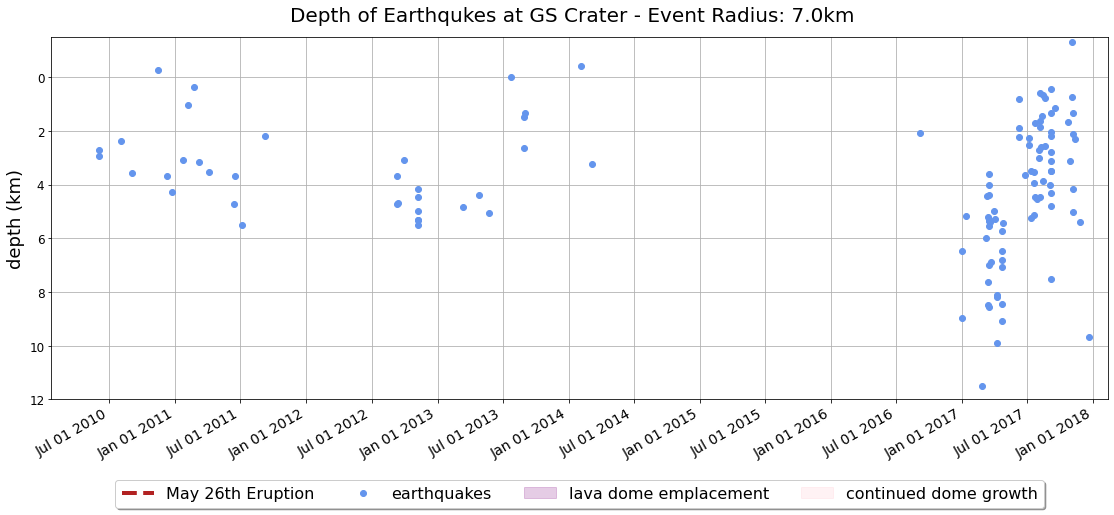

In [10]:
t=[]
for i in range(len(cat0)):
    tTime=obspy.UTCDateTime(cat0.iloc[i]["Date"])
    t.append(tTime.datetime.strftime('%Y-%m-%d'))
mdateslist = list(mdates.date2num(t))

#startend = [mdates.num2date(min(mdateslist)),mdates.num2date(max(mdateslist))]
startend = ["2010-01-01","2018-03-01"]
mdatesliststartend = list(mdates.date2num(startend))
fig, ax = plt.subplots(figsize = (16,7), facecolor = 'white')


ax.set_ylabel('depth (km)', fontsize = 18)
ax.plot(mdateslist,cat0.Depth,'o', alpha = 0)
ax.axvline(18771.21111111, color = 'firebrick',\
           linewidth = 4,linestyle = '--', label = 'May 26th Eruption')
ax.plot(mdateslist,cat0.Depth,'o', color  = 'cornflowerblue', label = 'earthquakes')
ax.set_xlim([mdatesliststartend[0]+20,mdatesliststartend[1]-20])
ax.set_ylim([ymax,ymin])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.tick_params(axis = 'x', labelsize=14)
ax.tick_params(axis = 'y', labelsize=12)
ax.axvspan(18822,18830, alpha=.2, color = 'purple', label = "lava dome emplacement")
ax.axvspan(18830,19086-20, alpha=.2, color = 'pink', label = "continued dome growth")
ax.grid()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
      ncol=4, fancybox=True,shadow=True, prop={'size':16})

fig.suptitle('Depth of Earthqukes at GS Crater'+' - Event Radius: '+str(round(offset*111,2))+'km', fontsize = 20)
fig.tight_layout()
fig.autofmt_xdate()

/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # This is added back by InteractiveShellApp.init_path()


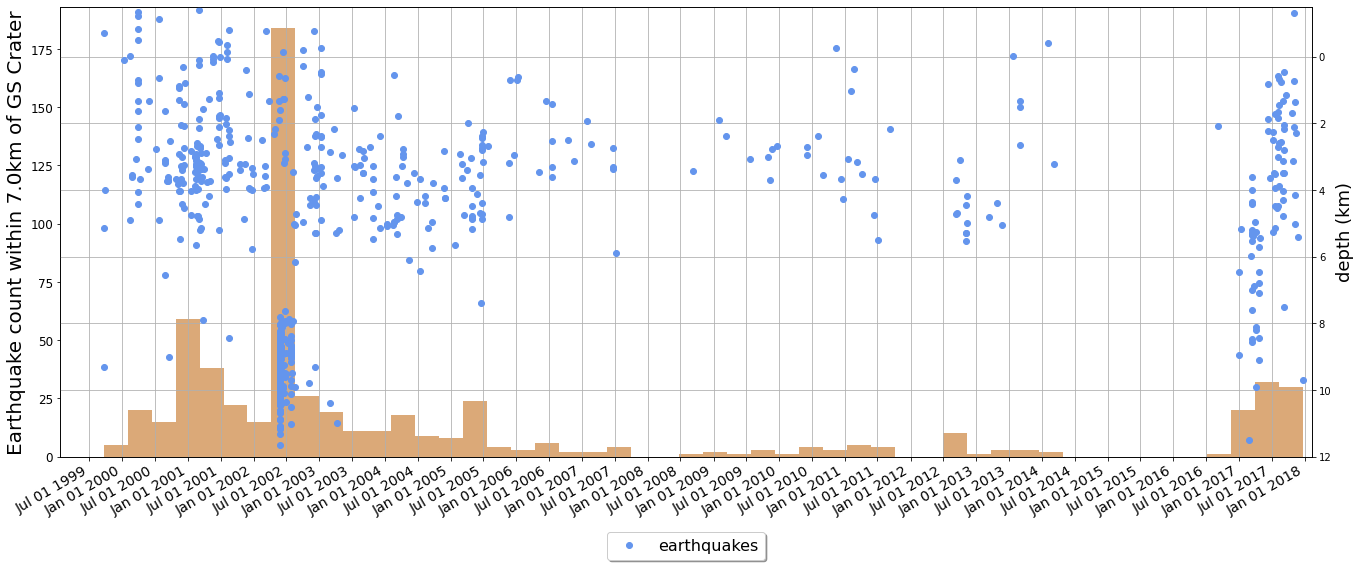

In [11]:
#Histogram X depth data

##########################HISTOGRAM
datesquake=[]
for i in range(len(cat0)):
    tTime=obspy.UTCDateTime(cat0.iloc[i]["Date"])
    datesquake.append(tTime.datetime.strftime('%Y-%m-%d'))
datesquake = list(mdates.date2num(t))

datahist = cat0.copy()
datahist.datetime = datesquake
#print(list(datahist.datetime))

#plt.hist(date_list, bins = nummonth, ec="k")
#plt.gcf().autofmt_xdate()
#plt.show()

fig, axs = plt.subplots(figsize = (19,8), facecolor = 'white') 
    
axs.hist(datesquake, bins=50,color = 'peru', label = 'Earthquake Count', alpha = .7)
axs.set_ylabel("Earthquake count within "+str(round(offset*111, 2))+'km of GS Crater', fontsize=20)
axs.grid(axis = 'x')


###########################DEPTH

axs2 = axs.twinx()  #a second axes that shares the same x-axis
#startend = [mdates.num2date(min(mdateslist)),mdates.num2date(max(mdateslist))]
startend = ["1999-01-01","2018-03-01"]
mdatesliststartend = list(mdates.date2num(startend))


axs2.set_ylabel('depth (km)', fontsize = 18)
axs2.plot(mdateslist,cat0.Depth,'o', alpha = 0)
#axs2.axvline(18771.21111111, color = 'firebrick',\
#            linewidth = 4,linestyle = '--', label = 'May 26th Eruption')
axs2.plot(mdateslist,cat0.Depth,'o', color  = 'cornflowerblue', label = 'earthquakes')
axs2.set_xlim([mdatesliststartend[0]+20,mdatesliststartend[1]-20])
axs2.set_ylim([ymax,ymin])

axs2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))
axs2.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
axs.tick_params(axis = 'x', labelsize=14)
axs.tick_params(axis = 'y', labelsize=12)
# axs2.axvspan(18822,18830, alpha=.2, color = 'purple', label = "lava dome emplacement")
# axs2.axvspan(18830,19086-20, alpha=.2, color = 'pink', label = "continued dome growth")
axs2.grid()
axs2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
      ncol=4, fancybox=True,shadow=True, prop={'size':16})

fig.tight_layout()
fig.autofmt_xdate()
# axs2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
#           ncol=6, fancybox=True,shadow=True, prop={'size':16})